# Model Skill Reporting

## Simulate ground truth data

In [1]:
data = loadCSV("sirs-simulated.csv")
times = data.time
infected_ground_truth = data.I

## Load and simulate models of interest

In [2]:
nSamples = 200
model1 = loadESL("sir.easel")
model2 = loadESL("sir-vd.easel")
model3 = loadESL("sirs.easel")

In [3]:
model1_samples = value(sample(model1.I at times, nSamples))
model2_samples = value(sample(model2.I at times, nSamples))
model3_samples = value(sample(model3.I at times, nSamples))

## Compute ranking

In [4]:
alphas = [0.02, 0.05, 0.1, 0.2, 0.4, 0.8]
ranks = modelSkillRank([model1_samples, model2_samples, model3_samples], 
                        alphas, 
                        value(infected_ground_truth))
table(["model", "mean score"], [["model1", "model2", "model3"], ranks])

|model|mean score|
|---|---|
|model1|0.3|
|model2|0.4|
|model3|0.8|

## Distribution of Model Predictions

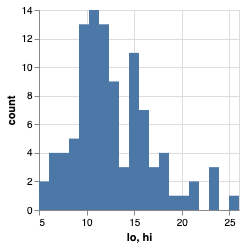

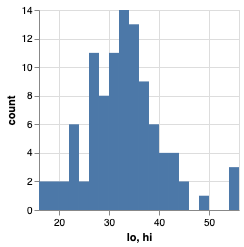

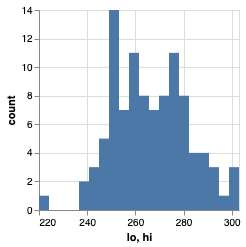

In [5]:
histogram(sample(model1.I at max(data.time) + 7, 100), 20)
histogram(sample(model2.I at max(data.time) + 7, 100), 20)
histogram(sample(model3.I at max(data.time) + 7, 100), 20)

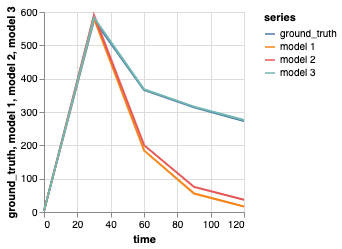

In [9]:
plot(times, 
     [value(infected_ground_truth), 
      mean(model1_samples), 
      mean(model2_samples), 
      mean(model3_samples)], 
      "time", 
      "ground_truth", 
      "model 1", 
      "model 2", 
      "model 3")